# Question 1

In [1]:
# Imports
import PIL
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd

In [2]:
# Reshaping, flattening images and separating the color channels
imgs = os.listdir("afhq_dog/")
img_dir = "afhq_dog/"

flattened = []
for img in imgs:
    resized_img = PIL.Image.open("{}{}".format(img_dir, img)).resize((64,64), Image.BILINEAR) # Resizing to 64x64
    flattened.append(np.array(resized_img).astype('int').flatten().reshape(4096, 3)) # Flattening images

X = np.array(flattened) # Stacking and getting array of 5239 * 4096 *3

red_channel = X[:,:, 0] # Slicing to obtain each color channel
green_channel = X[:,:, 1]
blue_channel = X[:,:, 2]

In [3]:
def pca(Xi, ks, output): # It will take each channel at once and will find pca of it
    Xi_mean = np.mean(Xi, axis = 0) # Xmean
    Xi_minus_mean = Xi - Xi_mean # Subtracting mean
    
    covariance_matrix = np.cov(Xi_minus_mean.T) # Finding Cov(X,X)
    
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) # Finding eigenvalues and vectors
    eigenvectors = eigenvectors.T # Taking transpose to have row matrix
    
    sorted_indices = np.argsort(eigenvalues)[::-1] # Sorting in descending order
    
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[sorted_indices]
    
    kpc_arr = []
    reduced_arr = []
    reconstructed_arr = []
    
    for k in ks:
        k_principal_components = eigenvectors[0:k] # First 19 needed for 70% PVE
        k_eigenvalues = eigenvalues[0:k]
        reduced_Xi = np.dot(Xi_minus_mean, k_principal_components.T)
        reconstructed_Xi = np.dot(reduced_Xi, k_principal_components) + Xi_mean
        
        kpc_arr.append(k_principal_components)
        reduced_arr.append(reduced_Xi)
        reconstructed_arr.append(reconstructed_Xi)
        
        if output:
            print("PVE of {} Principal Vectors: ".format(k), k_eigenvalues/np.sum(eigenvalues))
            print("Total PVE of {} Principal Vectors: ".format(k), np.sum(k_eigenvalues/np.sum(eigenvalues)))
            
    return kpc_arr, reduced_arr, reconstructed_arr

In [7]:
# Q1.1
ks = [10] # Finding pca, projection, and reconstruction for first 10 PCA
print("For red channel: ")
red_channel_pca, projection_red, reconstructed_red = pca(red_channel, ks, True)
print("For green channel: ")
green_channel_pca, projection_green, reconstructed_green = pca(green_channel, ks, True)
print("For blue channel: ")
blue_channel_pca, projection_blue, reconstructed_blue = pca(blue_channel, ks, True)

For red channel: 
PVE of 10 Principal Vectors:  [0.21506811 0.13542096 0.07504082 0.05172646 0.0422859  0.02458043
 0.02177032 0.01989657 0.01706975 0.01655849]
Total PVE of 10 Principal Vectors:  0.6194178151855934
For green channel: 
PVE of 10 Principal Vectors:  [0.20045373 0.13767588 0.07695188 0.05396965 0.04291814 0.02602156
 0.02142609 0.02081249 0.0173932  0.01681111]
Total PVE of 10 Principal Vectors:  0.6144337490672251
For blue channel: 
PVE of 10 Principal Vectors:  [0.22994562 0.1367701  0.07033232 0.05355895 0.0398173  0.02373058
 0.02098965 0.02075654 0.01668027 0.01629147]
Total PVE of 10 Principal Vectors:  0.6288728015916357


In [5]:
ks = [19] # Finding pca, projection, and reconstruction for first 10 PCA
print("For red channel: ")
red_channel_pca, projection_red, reconstructed_red = pca(red_channel, ks, True)
print("For green channel: ")
green_channel_pca, projection_green, reconstructed_green = pca(green_channel, ks, True)
print("For blue channel: ")
blue_channel_pca, projection_blue, reconstructed_blue = pca(blue_channel, ks, True)

For red channel: 
PVE of 19 Principal Vectors:  [0.21506811 0.13542096 0.07504082 0.05172646 0.0422859  0.02458043
 0.02177032 0.01989657 0.01706975 0.01655849 0.01407688 0.0130915
 0.01078741 0.01030046 0.00978004 0.00883312 0.00870801 0.00792801
 0.00767594]
Total PVE of 19 Principal Vectors:  0.7105991696536027
For green channel: 
PVE of 19 Principal Vectors:  [0.20045373 0.13767588 0.07695188 0.05396965 0.04291814 0.02602156
 0.02142609 0.02081249 0.0173932  0.01681111 0.01425878 0.01316021
 0.01086393 0.01039342 0.00981739 0.00917685 0.00888496 0.00804122
 0.00783142]
Total PVE of 19 Principal Vectors:  0.7068619400751089
For blue channel: 
PVE of 19 Principal Vectors:  [0.22994562 0.1367701  0.07033232 0.05355895 0.0398173  0.02373058
 0.02098965 0.02075654 0.01668027 0.01629147 0.01421496 0.01262
 0.01045874 0.01018983 0.00935281 0.00876593 0.00789969 0.00776429
 0.00748676]
Total PVE of 19 Principal Vectors:  0.7176258119072795


In [8]:
# Q1.2
reshaped_red_channel_pca = red_channel_pca[0].reshape(10, 64,64)
reshaped_green_channel_pca = green_channel_pca[0].reshape(10, 64,64)
reshaped_blue_channel_pca = blue_channel_pca[0].reshape(10, 64,64)

# Reshaping and scaling
scaled_red_channel_pca = ((reshaped_red_channel_pca - np.min(reshaped_red_channel_pca))
                          /(np.max(reshaped_red_channel_pca) - np.min(reshaped_red_channel_pca)))

scaled_green_channel_pca = ((reshaped_green_channel_pca - np.min(reshaped_green_channel_pca))
                          /(np.max(reshaped_green_channel_pca) - np.min(reshaped_green_channel_pca)))

scaled_blue_channel_pca = ((reshaped_blue_channel_pca - np.min(reshaped_blue_channel_pca))
                          /(np.max(reshaped_blue_channel_pca) - np.min(reshaped_blue_channel_pca)))

In [9]:
# Stacking to obtain RGB images
rgb_stacked = np.stack((scaled_red_channel_pca, scaled_green_channel_pca, scaled_blue_channel_pca), axis=-1) 

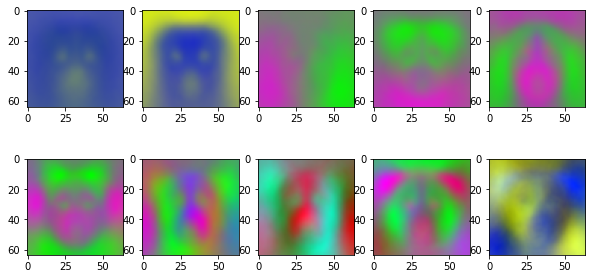

In [10]:
# Visualizing first 10 PCA
fig = plt.figure(figsize=(10, 5))
cols = 5
rows = 2
for i in range(0, 10):
    eigenvalue_img = rgb_stacked[i]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(eigenvalue_img)
plt.show()

In [11]:
# Q1.3
k_values = [1, 50, 250, 500, 1000, 4096]

# Reconstructing for 6 different k values
red_channel_pca, projection_red, reconstructed_red = pca(red_channel, k_values, False) 
green_channel_pca, projection_blue, reconstructed_green = pca(green_channel, k_values, False)
blue_channel_pca, projection_green, reconstructed_blue = pca(blue_channel, k_values, False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


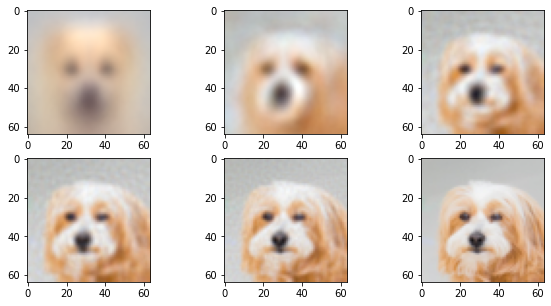

In [12]:
# Visualizing the reconstructed images
fig = plt.figure(figsize=(10, 5))
cols = 3
rows = 2
for i in range(0, 6):
    rgb_stacked = np.stack((reconstructed_red[i][0], reconstructed_green[i][0], reconstructed_blue[i][0]), axis=-1).reshape(64,64,3)
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(rgb_stacked.astype('int'))

plt.show()